In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Read in ZHVI Home Data

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**ZHVI = Zillow Home Value Index**

In [2]:
zhvi = pd.read_csv("Zip_Zhvi_Summary_AllHomes.csv")
zhvi.head(5)

,Date,RegionID,RegionName,State,Metro,County,City,SizeRank,Zhvi,MoM,QoQ,YoY,5Year,10Year,PeakMonth,PeakQuarter,PeakZHVI,PctFallFromPeak,LastTimeAtCurrZHVI
0,2016-05-31,61639,10025,NY,New York,New York,New York,0,1065700,-0.019325,-0.014792,0.079081,0.074313,0.036853,2016-03,2016-Q1,1096800,-0.028355,2015-08
1,2016-05-31,84654,60657,IL,Chicago,Cook,Chicago,1,311400,-0.000321,0.005165,0.008746,0.028485,-0.002845,2007-09,2007-Q3,324300,-0.039778,2005-06
2,2016-05-31,61637,10023,NY,New York,New York,New York,2,1060600,-0.005905,-0.041309,0.029809,0.045511,0.024610,2015-09,2015-Q3,1129300,-0.060834,2015-07
3,2016-05-31,84616,60614,IL,Chicago,Cook,Chicago,3,381500,0.004476,0.013819,0.067133,0.027629,-0.000679,2007-09,2007-Q3,398100,-0.041698,2005-12
4,2016-05-31,93144,79936,TX,El Paso,El Paso,El Paso,4,111100,0.000901,0.008167,-0.004480,-0.005489,0.003020,2007-12,2007-Q4,131000,-0.151908,2006-07


**Drop Zips with low Population**

**Sort By Price**

In [3]:
zhvi = zhvi[zhvi.SizeRank > 8000]
zhvi.sort_values(by='Zhvi').head(5)

,Date,RegionID,RegionName,State,Metro,County,City,SizeRank,Zhvi,MoM,QoQ,YoY,5Year,10Year,PeakMonth,PeakQuarter,PeakZHVI,PctFallFromPeak,LastTimeAtCurrZHVI
8152,2016-05-31,77207,44502,OH,Youngstown,Mahoning,Youngstown,8152,30800,0.006536,0.016502,-0.003236,-0.004484,NaN,2012-06,2012-Q2,32800,-0.060976,2011-02
11870,2016-05-31,77211,44506,OH,Youngstown,Mahoning,Youngstown,11870,31000,0.009772,0.033333,0.033333,-0.000644,NaN,2012-09,2012-Q3,32400,-0.043210,2011-04
10289,2016-05-31,77212,44507,OH,Youngstown,Mahoning,Youngstown,10289,31300,0.006431,0.029605,0.053872,-0.013494,NaN,2011-06,2011-Q2,33700,-0.071217,2011-02
12105,2016-05-31,77214,44510,OH,Youngstown,Mahoning,Youngstown,12105,31600,0.012821,0.029316,0.036066,-0.006820,NaN,2014-03,2014-Q1,33400,-0.053892,2012-05
12555,2016-05-31,65260,17935,PA,Pottsville,Schuylkill,Girardville,12555,31900,0.012698,0.045902,-0.067251,NaN,NaN,2014-12,2014-Q4,37900,-0.158311,2013-07


## Drop Unused Columns

In [4]:
zhvi.drop(['Date','RegionID','MoM'],1).head(5)

,RegionName,State,Metro,County,City,SizeRank,Zhvi,QoQ,YoY,5Year,10Year,PeakMonth,PeakQuarter,PeakZHVI,PctFallFromPeak,LastTimeAtCurrZHVI
8001,98328,WA,Seattle,Pierce,Eatonville,8001,262700,0.025771,0.088686,0.038867,-0.010417,2007-01,2007-Q1,312800,-0.160166,2005-11
8002,78163,TX,San Antonio,Comal,Bulverde,8002,331900,0.002114,0.030745,0.037125,0.028743,2016-05,2016-Q2,331900,0.000000,2016-05
8003,43203,OH,Columbus,Franklin,Columbus,8003,67300,0.010511,0.058176,-0.001184,NaN,2010-08,2010-Q3,71800,-0.062674,NaN
8004,2375,MA,Providence,Bristol,Easton,8004,334600,0.025123,0.053195,0.036420,-0.011017,2006-03,2006-Q1,377000,-0.112467,2004-03
8005,21617,MD,Baltimore,Queen Annes,Centreville,8005,311200,-0.004479,-0.003203,0.015969,-0.025977,2007-05,2007-Q2,410300,-0.241531,2004-09


# Start Graphing

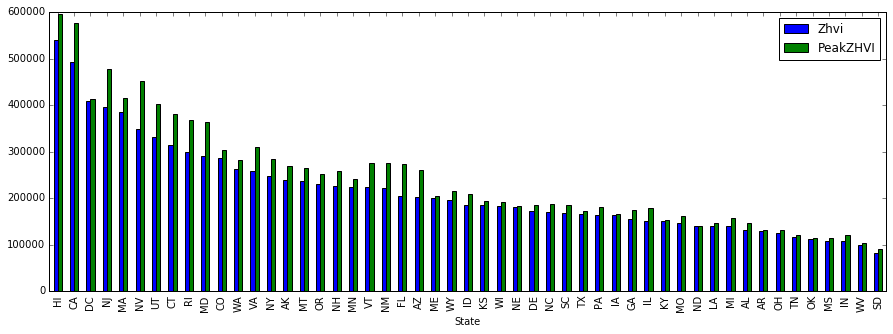

In [5]:
zhvistate = zhvi.groupby('State')

zhvistate[('Zhvi','PeakZHVI')].mean().sort_values(by='Zhvi',ascending=False).plot.bar(figsize=(15,5))

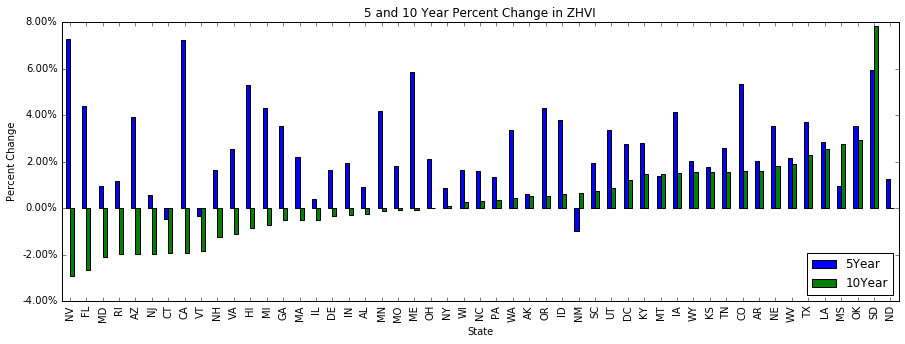

In [6]:
ax = zhvistate[('5Year','10Year')].mean().sort_values(by='10Year').plot.bar(figsize=(15,5),title='5 and 10 Year Percent Change in ZHVI')
vals = ax.get_yticks()
ax.set_yticklabels(['{:3.2f}%'.format(x*100) for x in vals])
ax.set_ylabel('Percent Change')

# Import Rent Data

In [7]:
rent = pd.read_csv('Zip_PriceToRentRatio_AllHomes (1).csv')
rent.head(4)

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,2010-10,2010-11,2010-12,...,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05
0,61639,10025,New York,NY,New York,New York,1,18.74,18.92,19.07,...,26.56,26.58,25.85,25.25,23.29,23.22,23.42,23.74,23.53,22.91
1,84654,60657,Chicago,IL,Chicago,Cook,2,13.27,13.20,13.20,...,12.33,12.39,12.27,12.30,12.41,12.39,12.46,12.39,12.41,12.35
2,61637,10023,New York,NY,New York,New York,3,20.48,20.73,20.59,...,25.62,25.16,24.16,23.62,21.78,21.97,21.88,21.55,21.43,20.88
3,84616,60614,Chicago,IL,Chicago,Cook,4,14.09,14.04,13.85,...,13.35,13.48,13.35,13.36,13.19,13.20,13.32,13.31,13.40,13.36


In [8]:
pricetorent = rent[['RegionName','City','State','SizeRank','2016-05']]
pricetorent.head(5)

,RegionName,City,State,SizeRank,2016-05
0,10025,New York,NY,1,22.91
1,60657,Chicago,IL,2,12.35
2,10023,New York,NY,3,20.88
3,60614,Chicago,IL,4,13.36
4,79936,El Paso,TX,5,9.10


## Rename Columns

In [9]:
pricetorent = pricetorent.rename(columns={'2016-05':'PtoR','RegionName':'Zip'})
pricetorent.head(5)

,Zip,City,State,SizeRank,PtoR
0,10025,New York,NY,1,22.91
1,60657,Chicago,IL,2,12.35
2,10023,New York,NY,3,20.88
3,60614,Chicago,IL,4,13.36
4,79936,El Paso,TX,5,9.10


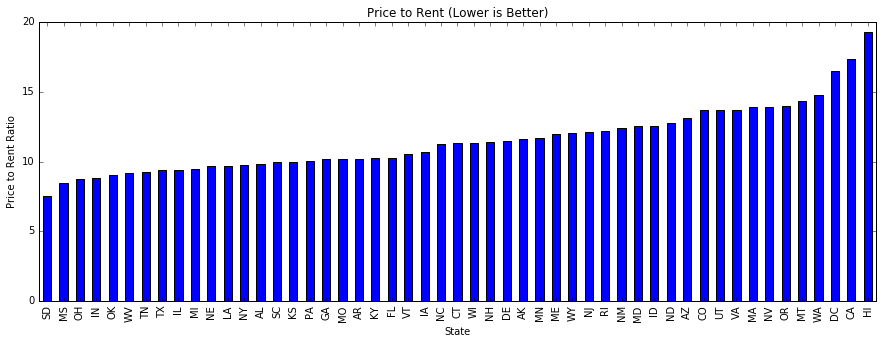

In [10]:
ptrstate = pricetorent.groupby('State')

ax = ptrstate['PtoR'].mean().sort_values().plot.bar(figsize=(15,5),title='Price to Rent (Lower is Better)')
ax.set_ylabel('Price to Rent Ratio')